# Capstone: Bellabeat Case Study
# Table of content

* [1. Scenario](#scenario)
* [2.Ask Phase](#ask_phase)
    * [2.1 Business Task](#business_task)
    * [2.2 Stakeholders](#stakeholders)    
* [3. Prepare Phase](#prepare_phase)
    * [3.1 Dataset Used](#dataset_used)
    * [3.2 Accessibility and Privacy of Data](#accessibility_and_privacy_of_data)
    * [3.3 Data Summary](#data_summary)
    * [3.4 Data Organization](#data_organization)
    * [3.5 Data Limitation](#data_limitation)
    * [3.6 Data Verification](#data_verification)
* [4. Process Phase](#process_phase)
    * [4.1 Datasets Selected](#datasets_selected)
    * [4.2 Datasets Cleaning and Manipulation](#datasets_cleaning_and_manipulation)
    * [4.3 Datasets Merging](#datasets_merging)
* [5. Analyze & Share Phases](#analyze_&_share_phases)
    * [5.1 Daily Summary Statistics](#daily_summary_statistics)
    * [5.2 User Types by Activity Levels](#user_types_by_activity_levels)
    * [5.3 Steps and Minutes Asleep per Weekday](#steps_and_minutes_asleep_per_weekday)
    * [5.4 Hourly Steps Throughout the Day](#hourly_steps_throughout_the_day)
    * [5.5 Correlations](#correlations)
    * [5.6 Usage of the Tracker](#usage_of_the_tracker)
* [6. Act Phase](#act_phase)

# 1. Scenario <a id="scenario"></a>

Bellabeat is a high-tech company, founded in 2013, that produces health-focused smart products. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

By 2016, Bellabeat had opened offices around the world, launched multiple products and expanded their business globally.

Bellabeat has launched 5 products:
1. **Bellabeat app**: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits.
2. **Leaf**: Bellabeat's classic wellness tracker can be worn as a bracelet, necklace, or clip. It connects to the Bellabeat app to track activity, sleep, and stress.
3. **Time**: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. It connects to the Bellabeat app to provide you with insights into your daily wellness.
4. **Spring**: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. It connects to the Bellabeat app to track your hydration levels.
5. **Bellabeat membership**: Bellabeat also offers a subscription-based membership program for users. It gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.

# 2. Ask Phase<a id="ask_phase"></a>

### 2.1 Business Task<a id="business_task"></a>
The purpose of the business task is to identify some trends in how consumers use non-Bellabeat smart devices, how these trends can be applied to Bellabeat’s customers and how they can help influence Bellabeat’s marketing strategy.

### 2.2 Stakeholders<a id="stakeholders"></a>
1. **Urška Sršen** – Bellabeat’s cofounder and Chief Creative Officer 
2. **Sando Mur** – Mathematician and Bellabeat’s cofounder
3. **Bellabeat’s marketing analytics team** – a team of data analytics 

# 3. Prepare Phase<a id="prepare_phase"></a>

### 3.1 Dataset Used<a id="dataset_used"></a>
The dataset used for this analysis is [**FitBit Fitness Tracker Data.**](https://www.kaggle.com/datasets/arashnic/fitbit) (CC0: Public Domain, dataset made available through Mobius). 

### 3.2 Accessibility and Privacy of Data<a id="accessibility_and_privacy_of_data"></a>
The dataset is under the **CC0**: Public Domain Creative Common License – waiving all rights to the work and allowing for the dataset to be copies, modified, distributed and performed without asking for permission.

### 3.3 Data Summary<a id="data_summary"></a>
This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty three eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring.Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.

### 3.4 Data Organization<a id="data_organization"></a>
The dataset, obtained from **FitBit Fitness Tracker Data**, consists of a collection of quantitative data presented in 18 long-format .csv files. Data was obtained between April 12 and May 12, 2016, a 31-day period, from 33 participants. All files contain IDs as primary keys and each file includes multiple variables, such as Activity Date, Time, Distance, Steps, Intensity, Calories, Weight, etc.

The files specifically are:
1. dailyActivity_merged
2. dailyCalories_merged
3. dailyIntensities_merged
4. dailySteps_merged
5. heartrate_seconds_merged
6. hourlyCalories_merged
7. hourlyIntensities_merged
8. hourlySteps_merged
9. minuteCaloriesNarrow_merged
10. minuteCaloriesWide_merged
11. minuteIntensitiesNarrow_merged
12. minuteIntensitiesWide_merged
13. minuteMETsNarrow_merged
14. minuteSleep_merged
15. minuteStepsNarrow_merged
16. minuteStepsWide_merged
17. sleepDay_merged 
18. weightLogInfo_merged

Since our aim is to identify trends we will only focus on the analysis of **daily** and **hourly** data.

### 3.5 Data Limitation<a id="data_limitation"></a>

* **No Metadata Provided**: Crucial metadata, such as location, lifestyle, weather, temperature and humidity, which would have enriched the context of the data collected, were not included.
* **Missing Demographics**: Key demographics, such as gender and age, which are critical information, were not identified.
* **Small Sample Size**: The sample size of just thirty users is not representative of an ideal population, especially when considering variations in health and lifestyle data across different segments of society.
* **Data Collection**: The data collection period of only 31 days is limited in providing detailed recommendations. 
* **Obsolete data**:The FitBit Fitness Tracker data was collected in 2016 making the datasets obsolete for analyzing current trends.

### 3.6 Data Verification<a id="data_verification"></a>
To verify the data we will use **SQL** queries through the use of the R library **sqldf()**.

We install the packages and upload the necessary files.

In [48]:
library(tidyverse)  # a must-have in R 
library(janitor)    # for examining and cleaning dirty data
library(lubridate)  # for date & time formats
library(sqldf)      # for running SQL in R
library(scales)     # scaling used by ggplots
library(gridExtra)  # to arrange the graphs

In [49]:
# now let's load the data
weight<- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
d_activity <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
d_calories <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
d_intensities <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
d_steps <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
d_sleep <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
heartrate_seconds <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
h_calories <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
h_intensities <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
h_steps <- read_csv(file="/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")


Rows: 67 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Date
dbl (6): Id, WeightKg, WeightPounds, Fat, BMI, LogId
lgl (1): IsManualReport

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, Calories

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or

We can verify, through some SQL queries, that the data "dailyCalories_merged", "dailyIntensities_merged" and "dailySteps_merged" are contained in "dailyActivities_merged".

In [50]:
# now let's check that all the columns of the tables have the same number of observations
sqldf("SELECT 
            COUNT() AS number_of_observations_activity
       FROM 
           d_activity")
sqldf("SELECT 
           COUNT() AS number_of_observations_calories
       FROM 
           d_activity AS a
       LEFT JOIN d_calories AS c ON 
           a.Id = c.Id AND 
           a.ActivityDate = c.ActivityDay AND 
           a.Calories = c.Calories")
sqldf("SELECT 
           COUNT() AS number_of_observations_steps
       FROM 
           d_activity AS a 
       LEFT JOIN d_steps as s ON
           a.Id = s.Id AND 
           a.ActivityDate = s.ActivityDay AND 
           a.Totalsteps = s.StepTotal")
sqldf("SELECT 
           COUNT() AS number_of_observations_intensities
      FROM 
           d_activity AS a 
      LEFT JOIN d_intensities AS i ON 
           a.Id = i.Id AND 
           a.ActivityDate = i.ActivityDay AND 
           a.SedentaryMinutes = i.SedentaryMinutes AND
           a.LightlyActiveMinutes = i.LightlyActiveMinutes AND
           a.FairlyActiveMinutes = i.FairlyActiveMinutes AND
           a.VeryActiveMinutes = i.VeryActiveMinutes AND
           a.SedentaryActiveDistance = i.SedentaryActiveDistance AND
           a.LightActiveDistance = i.LightActiveDistance AND
           a.ModeratelyActiveDistance = i.ModeratelyActiveDistance AND
           a.VeryActiveDistance = i.VeryActiveDistance")

number_of_observations_activity
<int>
940


number_of_observations_calories
<int>
940


number_of_observations_steps
<int>
940


number_of_observations_intensities
<int>
940


So we can remove the "dailyCalories_merged", "dailyIntensities_merged" and "dailySteps_merged" files as we will be using "dailyActivities_merged".

In [51]:
rm(d_calories, d_intensities, d_steps)


Now, since CSV files are in long format, let's check how many actual users are present in each dataset.

In [52]:
sqldf("SELECT
            COUNT(DISTINCT Id) AS number_of_users__weight
       FROM 
            weight")
sqldf("SELECT
            COUNT(DISTINCT Id) AS number_of_users_d_activity
       FROM 
            d_activity")
sqldf("SELECT
            COUNT(DISTINCT Id) AS number_of_users_d_sleep
       FROM 
            d_sleep")
sqldf("SELECT
            COUNT(DISTINCT Id) AS number_of_users_h_calories
       FROM 
            h_calories")
sqldf("SELECT
            COUNT(DISTINCT Id) AS number_of_users_h_intensities
       FROM 
            h_intensities")
sqldf("SELECT
            COUNT(DISTINCT Id) AS number_of_users_h_steps
       FROM 
            h_steps")
sqldf("SELECT
            COUNT(DISTINCT Id) AS number_of_users_s_heartrate
       FROM 
            heartrate_seconds")

number_of_users__weight
<int>
8


number_of_users_d_activity
<int>
33


number_of_users_d_sleep
<int>
24


number_of_users_h_calories
<int>
33


number_of_users_h_intensities
<int>
33


number_of_users_h_steps
<int>
33


number_of_users_s_heartrate
<int>
14


As we can see the "weightLogInfo_merged" and "heartrate_seconds_merged" datasets have too small a data sample to provide enough information to make an effective business decision.

For this reason the files will be excluded from our analysis.

In [53]:
rm(weight, heartrate_seconds)

# 4. Process Phase<a id="process_phase"></a>

### 4.1 Datasets Selected<a id="datasets_selected"></a>
The selected datasets are:
* dailyActivity_merged
* hourlyCalories_merged
* hourlyIntensities_merged
* hourlySteps_merged
* sleepDay_merged

### 4.2 Datasets Cleaning and Manipulation<a id="datasets_cleaning_and_manipulation"></a>
The datasets were cleaned and manipulated through Google Sheets.

To be able to work easily with dates I had to change the regional settings by changing from Italy to United States.

**dailyActivity_merged**
* Conversion of column names: by convention we render the names of all columns, written in CamelCase, in snake_case
* Duplicate Removal: No duplicates found
* Date Formatting: Formatting column B (activity_date) in Date
* Numeric data formatting: Formatting columns D (total_distance), E (tracker_distance), F (logged_activities_distance), G (very_active_distance), H (moderately_active_distance), I (light_active_distance), J (sedentary_active_distance) in two decimal places.
* Creation of new column: Creation of a new column P (day_of_the_week) containing the day of the week calculated from the date contained in column B (activity_date)
* Null values: There are no null values
* Check id length: all values in column A (id) are of length 10

**sleepDay_merged**
* Conversion of column names: by convention we render the names of all columns, written in CamelCase, in snake_case
* Duplicate Removal: 3 duplicate rows found and removed
* Date Formatting: Formatting column B (sleep_day) in Date
* Null values: There are no null values
* Check id length: all values in column A (id) are of length 10

**hourlyCalories_merged**
* Conversion of column names: by convention we render the names of all columns, written in CamelCase, in snake_case
* Duplicate Removal: No duplicates found
* Date Formatting: Formatting column B (activity_day) in Date and Time
* Creation of new column: Creation of a new column D (activity_hour), containing the time extracted from column B (activity_day)
* Creation of new column: Creation of a new column E (day_of_the_week) containing the day of the week calculated from the date contained in column B (activity_date)
* Null values: There are no null values
* Check id length: all values in column A (id) are of length 10

**hourlyIntensities_merged**
* Conversion of column names: by convention we render the names of all columns, written in CamelCase, in snake_case
* Duplicate Removal: No duplicates found
* Date Formatting: Formatting column B (activity_day) in Date and Time
* Creation of new column: Creation of a new column D (activity_hour), containing the time extracted from column B (activity_day)
* Null values: There are no null values
* Check id length: all values in column A (id) are of length 10

**hourlySteps_merged**
* Conversion of column names: by convention we render the names of all columns, written in CamelCase, in snake_case
* Duplicate Removal: No duplicates found
* Date Formatting: Formatting column B (activity_day) in Date and Time
* Creation of new column: Creation of a new column E (activity_hour), containing the time extracted from column B (activity_day)
* Numeric data formatting: Formatting column D (average_intensity) in two decimal places.
* Null values: There are no null values
* Check id length: all values in column A (id) are of length 10

### 4.3 Datasets Merging<a id="datasets_merging"></a>
Finally we proceed to create two new distinct data sets: one representing the union of the daily information and another representing the union of the hourly information, using the clean data as the basis for both sets.

In [54]:
# First of all we upload the clean files
d_activity <- read_csv(file="/kaggle/input/bellabeat-case-study-clean-data/Bellabeat Case Study - dailyActivity_merged.csv")
d_sleep <- read_csv(file="/kaggle/input/bellabeat-case-study-clean-data/Bellabeat Case Study - sleepDay_merged.csv")
h_calories <- read_csv(file="/kaggle/input/bellabeat-case-study-clean-data/Bellabeat Case Study - hourlyCalories_merged.csv")
h_intensities <- read_csv(file="/kaggle/input/bellabeat-case-study-clean-data/Bellabeat Case Study - hourlyIntensities_merged.csv")
h_steps <- read_csv(file="/kaggle/input/bellabeat-case-study-clean-data/Bellabeat Case Study - hourlySteps_merged.csv")

# We rename the column containing the dates to d_activity and d_sleep
d_activity <- d_activity %>%
  rename(date = activity_date)

d_sleep<- d_sleep %>%
  rename(date = sleep_day)

# Since sleepDay_merged has fewer observations than dailyActivity_merged, we add all.x =TRUE to also keep the unpaired
# observations of dailyActivity_merged. 
daily_df <- merge(d_activity, d_sleep, by= c("id","date"), all.x = TRUE) 

hourly_df <- merge(h_calories, h_intensities, by = c("id", "activity_day", "activity_hour"))
hourly_df <- merge(hourly_df, h_steps, by = c("id", "activity_day", "activity_hour"))

# We can see that the activity_date column is not recognized as date, even though it was changed to google sheets,
# then we will convert it with R.
daily_df <- daily_df %>%
  mutate(date= as_date(date, format= "%m/%d/%Y"))

hourly_df <- hourly_df %>%
  mutate(activity_day= as_date(activity_day, format= "%m/%d/%Y"))

Rows: 940 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): activity_date, day_of_the_week
dbl (14): id, total_steps, total_distance, tracker_distance, logged_activiti...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 410 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): sleep_day
dbl (4): id, total_sleep_records, total_minutes_asleep, total_time_in_bed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 22099 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): activity_day, day_of_the_week
dbl  (2): id, calories
time (1): activity_hour

ℹ Use `spec()` to retrieve the ful

# 5. Analyze & Share Phases<a id="analyze_&_share_phases"></a>

### 5.1 Daily Summary Statistics<a id="daily_summary_statistics"></a>

In [55]:
daily_df %>%
    select(total_steps, calories, very_active_minutes, fairly_active_minutes, lightly_active_minutes, sedentary_minutes,
           total_sleep_records, total_minutes_asleep, total_time_in_bed) %>%
    summary()

  total_steps       calories    very_active_minutes fairly_active_minutes
 Min.   :    0   Min.   :   0   Min.   :  0.00      Min.   :  0.00       
 1st Qu.: 3790   1st Qu.:1828   1st Qu.:  0.00      1st Qu.:  0.00       
 Median : 7406   Median :2134   Median :  4.00      Median :  6.00       
 Mean   : 7638   Mean   :2304   Mean   : 21.16      Mean   : 13.56       
 3rd Qu.:10727   3rd Qu.:2793   3rd Qu.: 32.00      3rd Qu.: 19.00       
 Max.   :36019   Max.   :4900   Max.   :210.00      Max.   :143.00       
                                                                         
 lightly_active_minutes sedentary_minutes total_sleep_records
 Min.   :  0.0          Min.   :   0.0    Min.   :1.000      
 1st Qu.:127.0          1st Qu.: 729.8    1st Qu.:1.000      
 Median :199.0          Median :1057.5    Median :1.000      
 Mean   :192.8          Mean   : 991.2    Mean   :1.119      
 3rd Qu.:264.0          3rd Qu.:1229.5    3rd Qu.:1.000      
 Max.   :518.0          Max.   :1440

**Insight**:
* On average, each users takes 7,638 steps per day. This is lower than the daily 10,000 steps recommended by CDC.
* Average daily calories is 2304, which is between the recommended daily calories intake for men (2500) and women (2000).
* On average, each users spends 16.5 hours (991.2 minutes) per day being seated or inactive. That's almost 70% of the day!
* The Mean is way higher than the median in very active minutes and fairly active minutes, indicating a non-normal distribution. This indicates there may be only a few users with much longer active minutes, while most users are with short active minutes.
* On average, each users sleeps 6.99 hours (419.2 minutes) per day.

### 5.2 User Types by Activity Levels<a id="user_types_by_activity_levels"></a>

We categorize users into four groups based on their daily activity levels: Sedentary, Lightly Active, Fairly Active, and Very Active. 

In particular:
* **Sedentary** - Less than 5000 steps a day.
* **Lightly active** - Between 5000 and 7499 steps a day.
* **Fairly active** - Between 7500 and 9999 steps a day.
* **Very active** - More than 10000 steps a day.

This classification is derived from the information provided in the referenced [article](https://www.10000steps.org.au/articles/counting-steps/).

In [56]:
daily_average <- daily_df %>% 
                 group_by (id) %>% 
                 summarise(avg_daily_steps= mean(total_steps), avg_daily_cal= mean(calories), 
                 avg_daily_sleep= mean(total_minutes_asleep, na.rm = TRUE)) %>% 
                 mutate(user_type= case_when(
                        avg_daily_steps < 5000 ~ "sedentary",
                        avg_daily_steps >= 5000 & avg_daily_steps <7499 ~"lightly active",
                        avg_daily_steps >= 7499 & avg_daily_steps <9999 ~"fairly active",
                        avg_daily_steps >= 10000 ~"very active"))

head(daily_average)

id,avg_daily_steps,avg_daily_cal,avg_daily_sleep,user_type
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1503960366,12116.742,1816.419,360.28,very active
1624580081,5743.903,1483.355,NaN,lightly active
1644430081,7282.967,2811.300,294.00,lightly active
1844505072,2580.065,1573.484,652.00,sedentary
1927972279,916.129,2172.806,417.00,sedentary
2022484408,11370.645,2509.968,NaN,very active


Now that we have created a new column containing the number of user types, we will proceed to create a dataframe that expresses the percentage of each user type.

In [57]:
user_type_percent <- daily_average %>%
  group_by( user_type) %>%
  summarise( total = n()) %>% # calculate the number of rows for each group 
  mutate(total_percent = scales::percent( total / sum(total))) # calculation of the value in percentage

user_type_percent

user_type,total,total_percent
<chr>,<int>,<chr>
fairly active,9,27.3%
lightly active,9,27.3%
sedentary,8,24.2%
very active,7,21.2%


Since users are **distributed almost evenly across the four categories**, even though the sample size is small, this data set shows some **unbiasedness regarding activity level**.

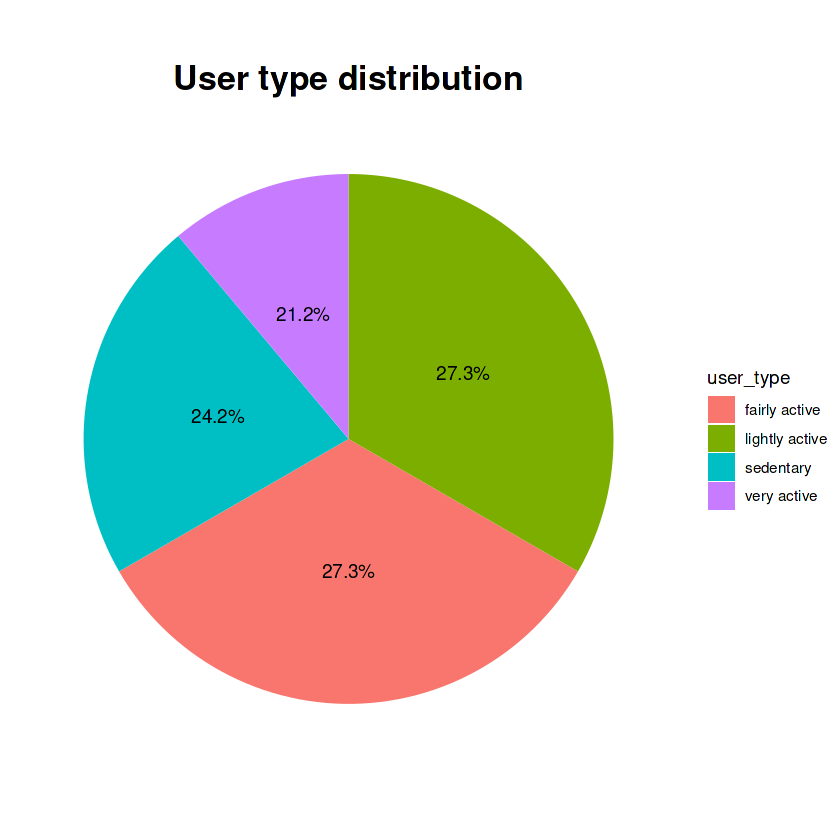

In [58]:
user_type_percent %>%
  ggplot(aes(x="",y= total_percent, fill = user_type)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=20, face = "bold")) +
  geom_text(aes(label = total_percent), position = position_stack(vjust = 0.5))+
  labs(title="User type distribution")

### 5.3 Steps and Minutes Asleep per Weekday<a id="steps_and_minutes_asleep_per_weekday"></a>
Now we will analyze user trends by identifying the days of the week when they are most active and those when they sleep the most. We'll also track whether users can achieve recommended levels of steps and sleep throughout the week.

In [59]:
weekday_ordered <- c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")

daily_df$day_of_the_week <- factor(daily_df$day_of_the_week, levels = weekday_ordered)

weekday_steps_sleep <- daily_df %>%
                          group_by(day_of_the_week) %>%
                          summarize(
                            daily_steps = round(mean(total_steps), 2),
                            daily_sleep = round(mean(total_minutes_asleep, na.rm = TRUE), 2)
                          )

weekday_steps_sleep

day_of_the_week,daily_steps,daily_sleep
<fct>,<dbl>,<dbl>
Monday,7780.87,419.50
Tuesday,8125.01,404.54
Wednesday,7559.37,434.68
Thursday,7405.84,401.30
Friday,7448.23,405.42
Saturday,8152.98,419.07
Sunday,6933.23,452.75


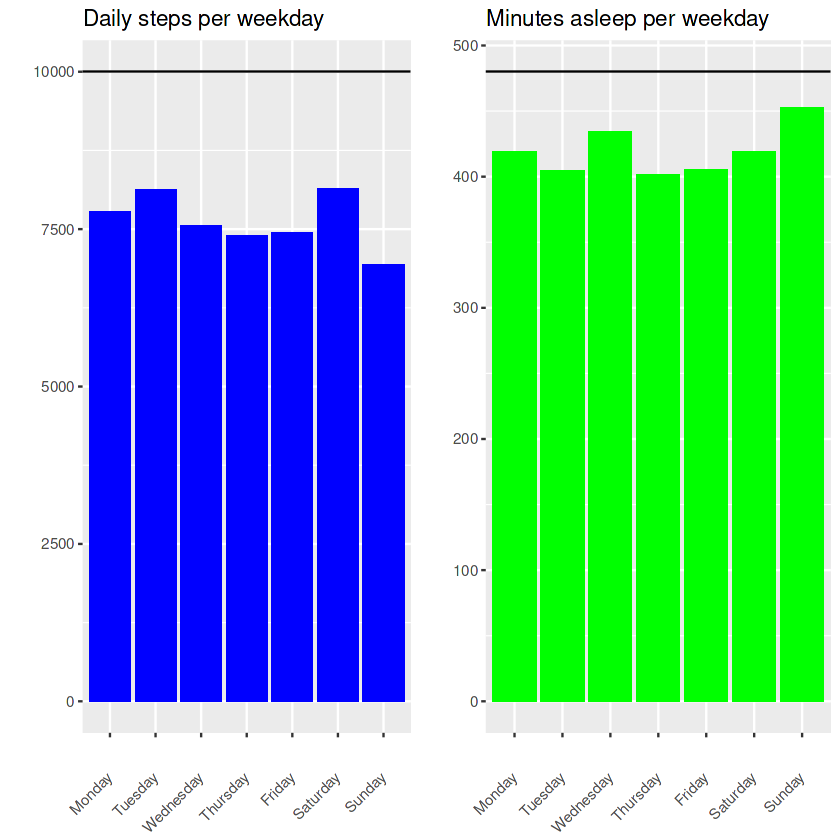

In [60]:
plot1 <- ggplot(weekday_steps_sleep) +
                geom_col(aes(day_of_the_week, daily_steps), fill = "blue") +
                geom_hline(yintercept = 10000) +
                labs(title = "Daily steps per weekday", x= "", y = "") +
                theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))
plot2 <- ggplot(weekday_steps_sleep) +
                geom_col( aes(day_of_the_week, daily_sleep), fill = "green") +
                geom_hline(yintercept = 480) +
                labs(title = "Minutes asleep per weekday", x= "", y = "") +
                theme(axis.text.x = element_text(angle = 45,vjust = 0.5, hjust = 1))

grid.arrange(plot1, plot2, ncol = 2)

**Insight**:
* Users not only never reach the recommended number of daily steps (10,000), but they don't even come close to it.
* Users don't sleep the recommended amount of minutes/ hours - 8 hours.

### 5.4 Hourly Steps Throughout the Day<a id="hourly_steps_throughout_the_day"></a>
Through a more in-depth analysis we establish precisely when users are most active during the day.

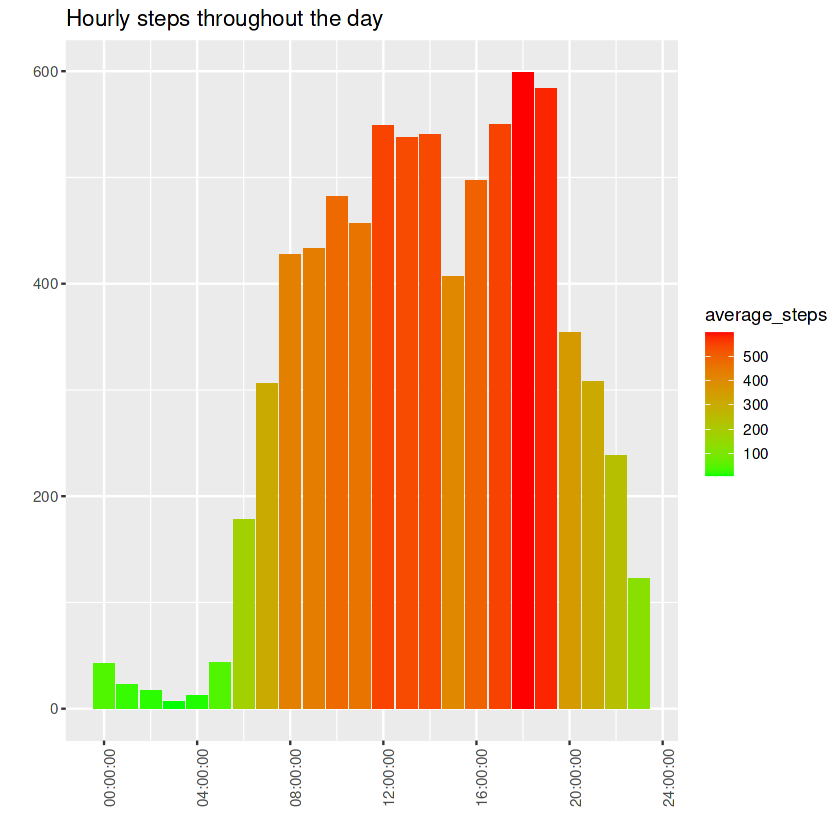

In [61]:
hourly_df %>%
  group_by(activity_hour) %>%
  summarize(average_steps = mean(step_total)) %>%
  ggplot() +
  geom_col(mapping = aes(x=activity_hour, y = average_steps, fill = average_steps)) + 
  labs(title = "Hourly steps throughout the day", x="", y="") + 
  scale_fill_gradient(low = "green", high = "red")+
  theme(axis.text.x = element_text(angle = 90))

**Insight**:
* We can see that users walking more steps during lunch time from 12pm to 2pm and evenings from 5pm and 7pm.

### 5.5 Correlations<a id="correlations"></a>
**Correlation Matrix**

In [62]:
dati <- daily_df[, c("total_steps", "calories", "sedentary_minutes", "total_time_in_bed", "total_minutes_asleep")]
dati <- cor(dati, use = "complete.obs") # This way, we will get a correlation matrix based only on the data
                                        # available without NA values.
dati

,total_steps,calories,sedentary_minutes,total_time_in_bed,total_minutes_asleep
total_steps,1.0000000,0.40630068,-0.13003596,-0.1662319,-0.19034392
calories,0.4063007,1.00000000,0.09865571,-0.1348046,-0.03169899
sedentary_minutes,-0.1300360,0.09865571,1.00000000,-0.6202804,-0.60107314
total_time_in_bed,-0.1662319,-0.13480458,-0.62028044,1.0000000,0.93042239
total_minutes_asleep,-0.1903439,-0.03169899,-0.60107314,0.9304224,1.00000000


**Insight**:
* Positive correlation between daily steps and calories burned (**+ 0.41**)
* Little to no correlation between calories burned and amount of sedentary time (**+ 0.10**)
* Negative correlation between amount of sedentary time and time asleep (**- 0.60**)
* Strong positive correlation between time in bed and time asleep (**+ 0.93**)
* Little to no correlation between daily steps and time asleep (**+ 0.19**)

Let's examine the correlations calculated across the graphs.

**Daily Steps v Calories Burned**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


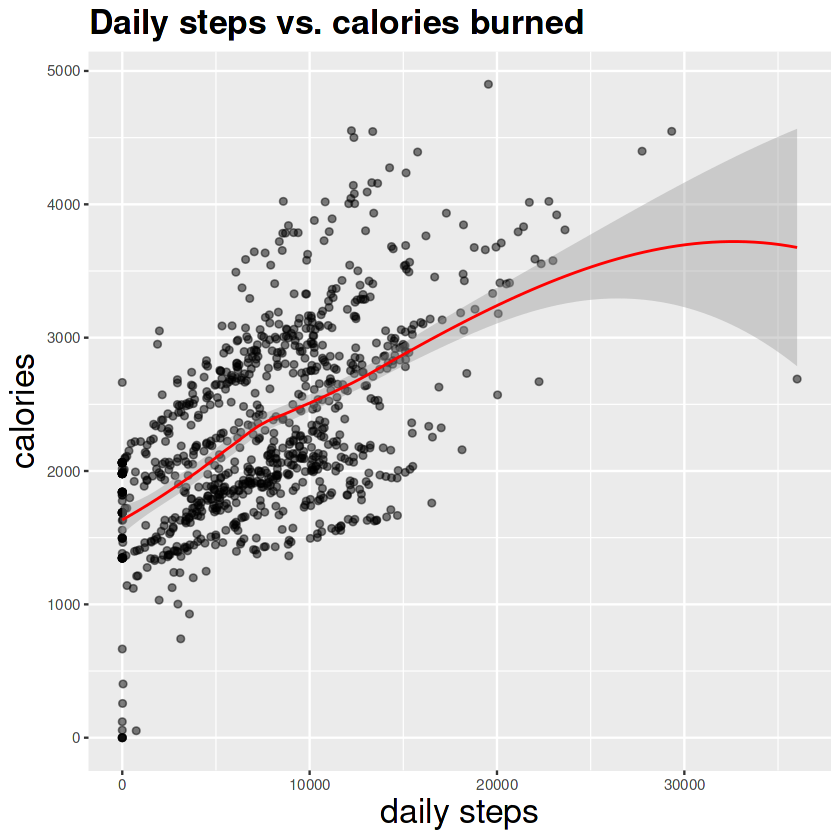

In [63]:
ggplot( daily_df, aes(total_steps, calories)) + 
    geom_jitter( alpha = .5) +                        # to avoid overlaps 
    geom_smooth( color = "red", linewidth = .6) +     # to view the trend of the data
    labs( title = "Daily steps vs. calories burned", x = "daily steps", y = "calories") +
    theme(plot.title = element_text(size = 20, face = "bold"), axis.title.x = element_text(size = 20), 
          axis.title.y = element_text(size = 20))

**Insights**

* Typically, users' daily step counts vary from 0 to 20,000 steps.
* If an individual takes approximately 10,000 steps per day, the estimated calorie expenditure will be around 2,500 calories.
* The greater the number of steps taken, the higher the potential calorie expenditure.

**Daily Steps v Time Asleep**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


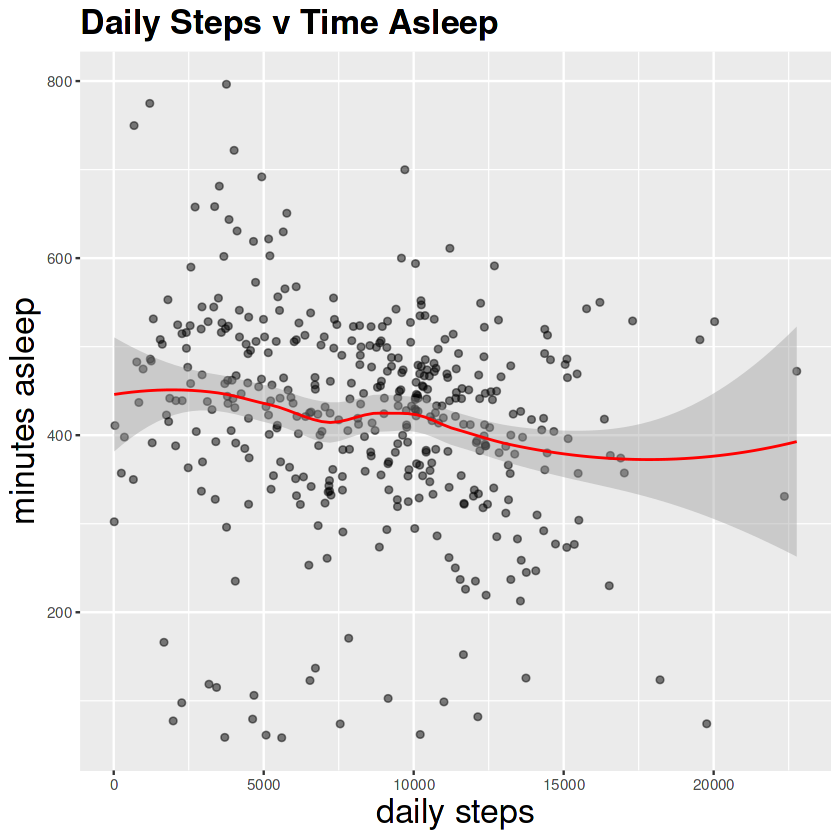

In [64]:
ggplot( data = subset( daily_df, !is.na( total_minutes_asleep)), # so that only valid elements are selected
       aes( total_steps, total_minutes_asleep) ) +
    geom_jitter( alpha = 0.5) +
    geom_smooth( color = "red", linewidth = .6) +
    labs( title = "Daily Steps v Time Asleep", x = "daily steps", y = "minutes asleep") +
    theme( plot.title = element_text( size = 20, face = "bold"), axis.title.x = element_text( size = 20), 
          axis.title.y = element_text( size = 20))

**Insights**

* Since the correlation between the two variables is not strong enough, it is not possible to make predictions or identify significant trends

**Daily Sedentary Minutes v Time Asleep**

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


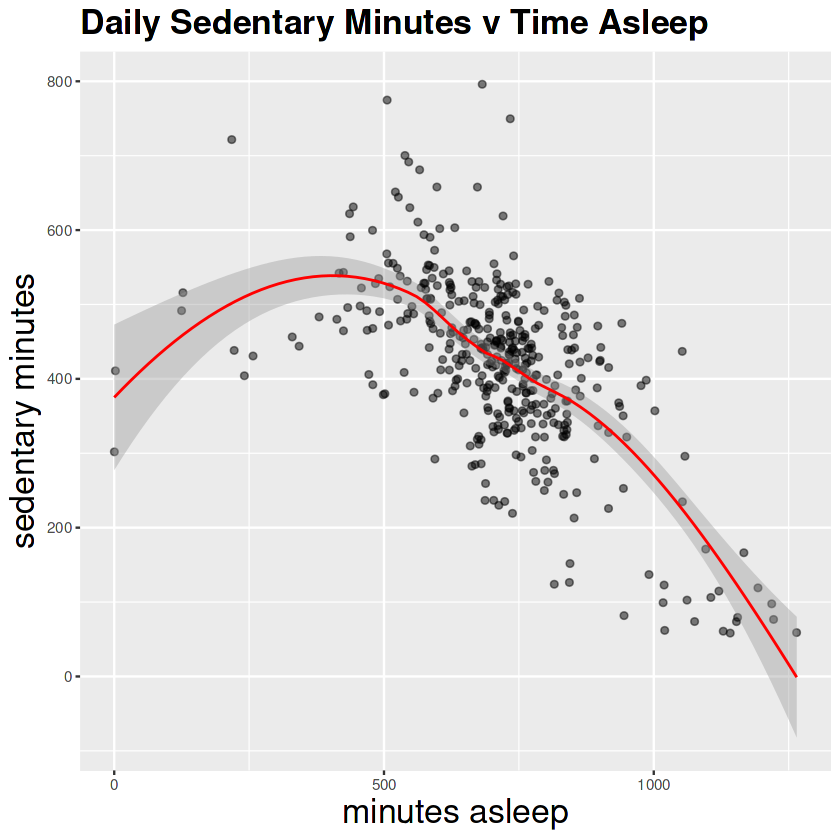

In [65]:
ggplot( data = subset( daily_df, !is.na( total_minutes_asleep)), 
       aes( sedentary_minutes, total_minutes_asleep) ) +
    geom_jitter( alpha = 0.5) +
    geom_smooth( color = "red", linewidth = .6) +
    labs( title = "Daily Sedentary Minutes v Time Asleep", x = "minutes asleep", y = "sedentary minutes") +
    theme( plot.title = element_text( size = 20, face = "bold"), axis.title.x = element_text( size = 20), 
          axis.title.y = element_text( size = 20))

**Insights**

* Being a negative correlation, a greater sedentary lifestyle during the day will result in a reduction in sleep time.

### 5.6 Usage of the Tracker<a id="usage_of_the_tracker"></a>

Finally, let's examine how often the users in our sample use their device. This way we can plan our marketing strategy and see which features could encourage the use of smart devices.

We will calculate the number of users who use their smart device daily, classifying our sample into three categories knowing that the interval is 31 days:

* **high usage**: users who use their device between 21 and 31 days.
* **moderate use**: users who use their device between 10 and 20 days.
* **low usage**: users who use the device between 1 and 10 days.

Let's calculate the new data frame.

In [66]:
daily_use <- daily_df %>%
                  group_by(id) %>%
                  summarize(days_used = sum(n())) %>%
                  mutate(usage = case_when(
                                days_used >= 1 & days_used <= 10 ~ "low use",
                                days_used >= 11 & days_used <=20 ~ "mid use",
                                days_used >= 21 & days_used <= 31 ~ "high use"))
head(daily_use)

id,days_used,usage
<dbl>,<int>,<chr>
1503960366,31,high use
1624580081,31,high use
1644430081,30,high use
1844505072,31,high use
1927972279,31,high use
2022484408,31,high use


Now let's calculate the percentage of each category

In [67]:
daily_use_percent <- daily_use %>%
  group_by(usage) %>%
  summarise(user_count= n()) %>%
  mutate(total_percent= scales::percent(user_count/sum(user_count)))

head(daily_use_percent)

usage,user_count,total_percent
<chr>,<int>,<chr>
high use,29,87.9%
low use,1,3.0%
mid use,3,9.1%


Now that we have our new table we can create our plot:

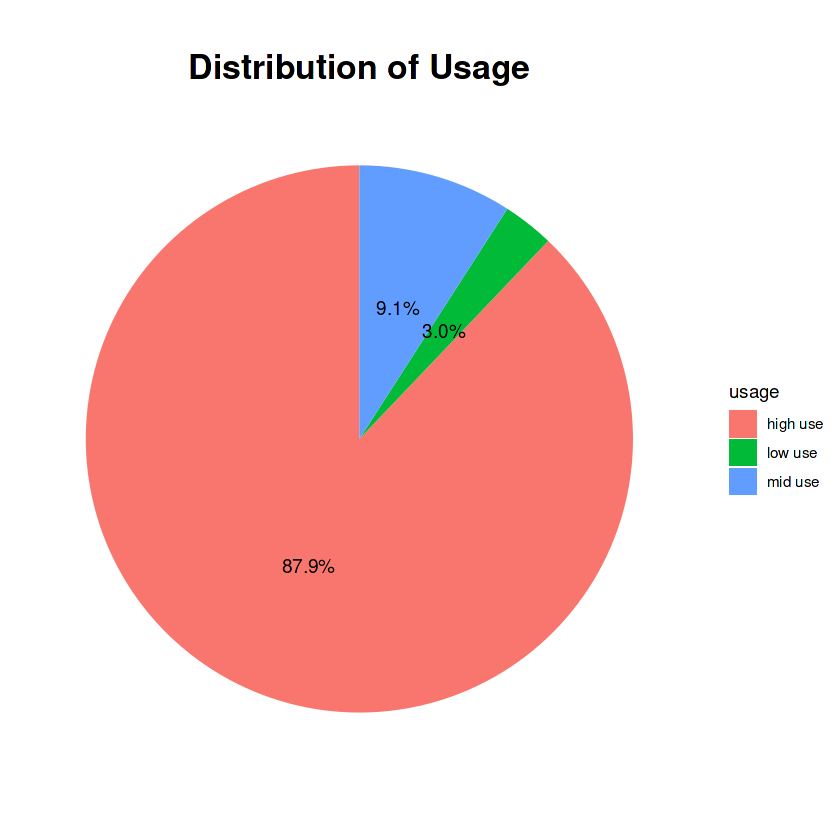

In [68]:
daily_use_percent %>%
  ggplot(aes(x="",y= user_count, fill = usage)) +
  geom_bar(stat = "identity", width = 1)+
  coord_polar("y", start=0)+
  theme_minimal()+
  theme(axis.title.x= element_blank(),
        axis.title.y = element_blank(),
        panel.border = element_blank(), 
        panel.grid = element_blank(), 
        axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        plot.title = element_text(hjust = 0.5, size=20, face = "bold")) +
  geom_text(aes(label = total_percent), position = position_stack(vjust = 0.5))+
  labs(title="Distribution of Usage")

**Insights**

* 87.9% of users in our sample use their device frequently, between 21 and 31 days.
* 9.1% use their device for 11 to 20 days.
* 3.0% of our sample uses their device very rarely.

The vast majority of users use the tracker for more than 21 days within a month. However, it is important to note that not all users wear it continuously for 24 hours a day, every day. Let's check if there are any significant trends in this time interval.



In [69]:
h_step_trend <- hourly_df %>%
  group_by(activity_day) %>%
  summarise(average_hr= n()/33)

head(h_step_trend) #This is the average hours users keep the tracker on.

activity_day,average_hr
<date>,<dbl>
2016-04-12,24.00000
2016-04-13,24.00000
2016-04-14,24.00000
2016-04-15,23.75758
2016-04-16,23.27273
2016-04-17,23.27273


A line chart shows how users wear the tracker over time:


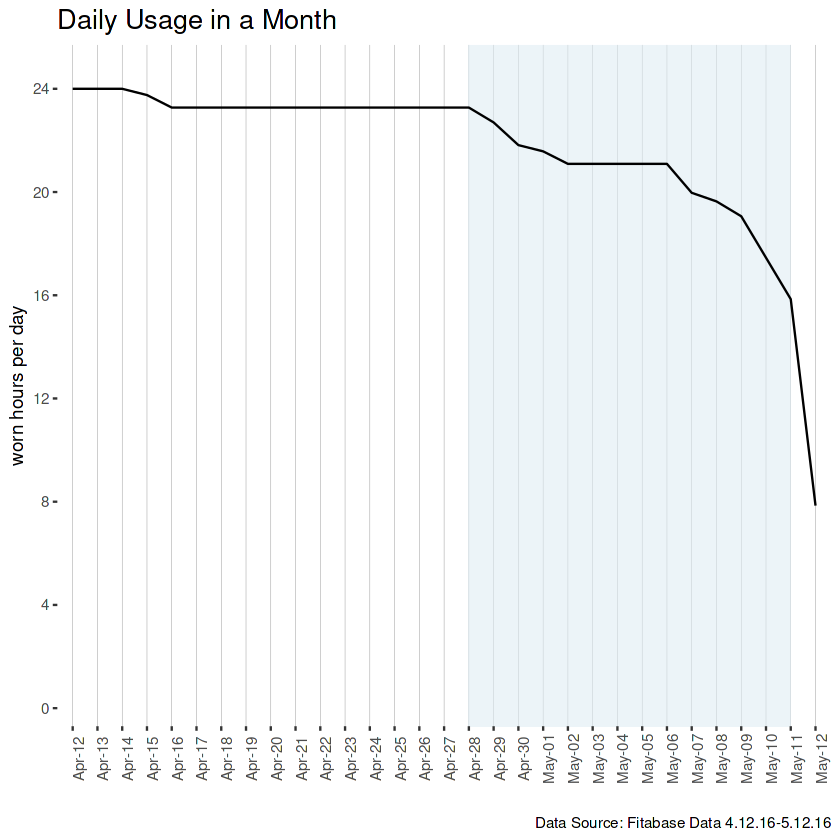

In [70]:
ggplot(h_step_trend, aes(x=activity_day,y=average_hr))+
  scale_x_date(breaks= date_breaks("1 day"), 
               labels= date_format("%b-%d"), 
               limits=(c(min(h_step_trend$activity_day),
                max(h_step_trend$activity_day))),
               expand=c(.02,.02))+
  scale_y_continuous(limits=c(0,25),
                     breaks= seq(0,max(h_step_trend$average_hr),by= 4), 
                     expand= c(0,.7))+
  labs(title="Daily Usage in a Month", 
       x=" ", y="worn hours per day",
       caption= 'Data Source: Fitabase Data 4.12.16-5.12.16')+
  scale_fill_brewer(palette="BuPu")+ 
  annotate("rect", xmin= as.Date("2016-04-28"), 
           xmax= as.Date("2016-05-11"),
           ymin= -Inf, ymax = Inf, 
           fill= "#E0ECF4", alpha=.6)+ 
theme(axis.text.x= element_text(angle = 90), 
        plot.title= element_text(size=16),
        panel.grid.major.x=element_line(colour="grey60",
                                        linetype="solid",size=0.1),
        panel.background= element_blank())+geom_line()

This downward trend suggests that users begin using the tracker throughout the day, maintaining an average usage of 23 hours per day, but then gradually reduce usage after 2 weeks (starting April 28).

# 6. Act Phase<a id="act_phase"></a>

**Key Insights**

* Users take 7,638 steps per day on average, lower than the daily 10,000 steps recommended by CDC. 
* Users spend 70% of the time being seated or inactive per day.
* The more steps a user take, the more calories the user burns
* At 10,000 steps, a user will burn around ~2500 calories
* The more sedentary time the user spent in the day, the less time will be spent asleep
* Users spend 6.9 hours asleep on average
* Users are generally more active on Saturdays and Tuesday.
* Sunday is the day when users are less active and sleep more.
* Activity level decrease from Tuesday throughout the weekdays.
* Users walking more steps during lunch time from 12pm to 2pm and evenings from 5pm and 7pm.
* Users of all activity level use FitBit
* The average time that users keep the tracker on gradually decreases after 2 weeks (April 28th).

**Recommendations** 

To address the main challenges, which include lack of physical activity (few daily steps and too much sedentary lifestyle), insufficient sleep and loss of interest in monitoring devices in the short term, we can adopt the following strategies:
1. **The app could send alerts to stimulate physical activity when the user remains inactive for a certain period of time**, especially useful for those who work from home. Furthermore, research has shown that encouraging social support can increase physical activity among adults, so the app could improve social networking features, such as internal chats or the creation of team goals among users, to promote a exercise routine.
2. The app could **customize** daily step goals based on users' profile, lifestyle and personal goals, and send notifications to encourage users to maintain them. **Adding features such as short games or interesting wellness information can foster a sense of gratification and consequently improve the level of user engagement** (as over time, the alerts sent by the app may lose their impact and be less interesting for users).
3. For users who want to improve sleep quality, **the app may encourage users to spend time in bed** (as there is an extremely **high positive correlation of 0.93** between the amount of time spent in bed and actual hours of sleep), **perhaps practicing meditation or listening of podcasts to increase total sleep time.**
4. It is important to carefully examine the reasons why users tend to reduce their usage time over time. For Bellabeat devices, features such as water resistance, a minimalist design, long battery life, and high comfort during extended use could incentivize users to wear them consistently throughout the day.